In [95]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the weights
Theta1 = np.array([[1, -1, 0.5, 1], [2, -2, 1, -1]])
Theta2 = np.array([[-1, 2, 1]])

# Define the input data
X1 = np.array([1, 0, 3, -1])  # i. (0, 3 − 1)
X2 = np.array([1, 1, 2, 1])  # ii. (1, 2, 1)
X3 = np.array([1, -1, 1, 2]) # iii. (-1, 1, 2)

# Perform forward propagation
A1 = sigmoid(np.dot(X1, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (0, 3 - 1):", A2)  # Output for i.

A1 = sigmoid(np.dot(X2, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (1, 2, 1):", A2)  # Output for ii.

A1 = sigmoid(np.dot(X3, Theta1.T))
A2 = sigmoid(np.dot(np.insert(A1, 0, 1), Theta2.T))

print("Output for input (-1, 1, 2):", A2)  # Output for iii.

Output for input (0, 3 - 1): [0.83653594]
Output for input (1, 2, 1): [0.8164761]
Output for input (-1, 1, 2): [0.87331584]


Q2

In [96]:
import numpy as np
import pandas as pd
import math
from PIL import Image
import operator
import matplotlib.pyplot as plt
import random
from collections import OrderedDict

In [97]:
# a)
def func_x(x):
    ans = ((x**2)*math.sin(2*math.pi*x)) + 0.7
    return ans

In [98]:
# b)
x1 = random.uniform(0,1)
x2 = random.uniform(0,1)

if (func_x(x1)>x2):
    Class=0
else:
    Class=1

print("x1: ",x1)
print("x2: ",x2)
print("f(x1): ",func_x(x1))
print("Class: ",Class)


x1:  0.2684892454514256
x2:  0.8058066058927411
f(x1):  0.7716005900013673
Class:  1


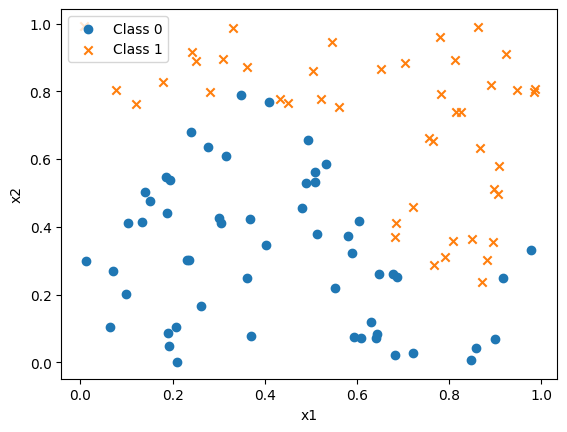

In [99]:
# c)
import math
import random
import matplotlib.pyplot as plt


points = []
for i in range(100):
    x1 = random.uniform(0,1)
    x2 = random.uniform(0,1)
    if func_x(x1) > x2:
        points.append((x1, x2, 0))
    else:
        points.append((x1, x2, 1))

# Combine points into a single array of tuples
points_arr = np.array(points)

class_0_points = [(x, y) for x, y, c in points if c == 0]
class_1_points = [(x, y) for x, y, c in points if c == 1]

plt.scatter(*zip(*class_0_points), marker='o', label='Class 0')
plt.scatter(*zip(*class_1_points), marker='x', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Q3

In [100]:
# a)
def weight(curr, next_nodes):
    #np.random.uniform(low = -0.3, high = 0.3, size=(next_nodes, curr))
    return np.random.rand(next_nodes,curr)

def weights_list(l_nodes):
    W = []
    for i in range(len(l_nodes) - 1):
        temp = weight(l_nodes[i] + 1, l_nodes[i+1])
        W.append(temp)
    return W

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nodes = [2,3,1]
weights = weights_list(nodes)
weights

[array([[0.93208393, 0.2370799 , 0.60127133],
        [0.29459255, 0.31148078, 0.82106646],
        [0.64403566, 0.15788288, 0.54503912]]),
 array([[0.3704039 , 0.74843379, 0.43210895, 0.13660521]])]

In [101]:
#b)
def forward_prop(x,w):
    z=w @ x
    a=sigmoid(z)
    return a

def full_forward_prop(w,x1,x2):
    a=[]
    a_t=[]
    l1=np.array([1,x1,x2])
    a.append(l1)
    for i in range(len(w)):
        a_temp=(forward_prop(a[i],w[i]))
        if (i !=(len(w)-1)):
            a_temp=np.insert(a_temp,0,1)
        a.append(a_temp)
    return a

activation=full_forward_prop(weights,points_arr[1][0],points_arr[1][1])

activation

[array([1.        , 0.4888083 , 0.52913412]),
 array([1.        , 0.79675316, 0.70709179, 0.73294361]),
 array([0.79776529])]

In [102]:
# # Get input values for the point we want to compute the activation for
x1, x2, target = points_arr[1]

# Compute final activation for the point
final_activation = full_forward_prop(weights, x1, x2)[-1][-1]

# Compute error delta at the final layer
error_delta = final_activation - target

print("Error delta at the final layer:", error_delta)


Error delta at the final layer: 0.7977652913497626
